In [1]:
# !git clone https://github.com/kumarvivek9088/aslsigndataset.git

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import os


In [7]:
 #from keras.utils import to_categorical
 #from keras.models import Sequential
 #from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
 #from keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import TensorBoard
#import os

In [3]:
# CODE WITH UPDATED PATHS FOR TRAIN &VAL
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generators for rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Set batch size
batch_size = 128

# Create generators with full paths
train_generator = train_datagen.flow_from_directory(
    directory=r'C:\Users\KIIT0001\Documents\REAL_TIME_DETECTION_ASSIGNMENT\aslsigndataset\splitdataset48x48\train',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    directory=r'C:\Users\KIIT0001\Documents\REAL_TIME_DETECTION_ASSIGNMENT\aslsigndataset\splitdataset48x48\val',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)


Found 1473 images belonging to 6 classes.
Found 372 images belonging to 6 classes.


In [4]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['A', 'M', 'N', 'S', 'T', 'blank']


In [5]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(6, activation='softmax'))

C:\Users\KIIT0001\.conda\envs\mousumi\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,183,174 (15.96 MB)

 Trainable params: 4,183,174 (15.96 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
!rm -rf Logs
logdir = os.path.join("Logs")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [9]:
# LBP
from skimage.feature import local_binary_pattern
import numpy as np

def extract_lbp(images):
    lbp_images = []
    for img in images:
        # Check if the image is already grayscale
        if img.ndim == 3:
            img_gray = np.squeeze(img)  # Remove channel dim if it's (H, W, 1) or (H, W, 3)
        else:
            img_gray = img
        
        lbp = local_binary_pattern(img_gray, P=8, R=1, method='uniform')  # Extract LBP
        lbp = lbp / lbp.max()  # Normalize to [0, 1]
        lbp_images.append(lbp[..., np.newaxis])  # Add channel back (shape: (H, W, 1))
    
    return np.array(lbp_images)


In [10]:
# TRANSFER LEARNING
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input, Concatenate
from tensorflow.keras.optimizers import Adam

def build_transfer_model(input_shape=(48, 48, 1), num_classes=6, fine_tune=False):
    inputs = Input(shape=input_shape)

    # Convert grayscale to 3-channel if needed
    if input_shape[-1] == 1:
        x = Concatenate()([inputs, inputs, inputs])  # shape becomes (48, 48, 3)
    else:
        x = inputs

    # Load pre-trained MobileNetV2
    base_model = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=(48, 48, 3)
    )
    base_model.trainable = fine_tune  # False initially, set True if fine-tuning

    # Add classification head
    x = base_model(x, training=fine_tune)
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=93,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[tensorboard_callback]
)

C:\Users\KIIT0001\.conda\envs\mousumi\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/93
11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.1550 - loss: 1.7947 - val_accuracy: 0.2734 - val_loss: 1.7753
Epoch 2/93
 1/11 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.1641 - loss: 1.7873

C:\Users\KIIT0001\.conda\envs\mousumi\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.1641 - loss: 1.7873 - val_accuracy: 0.2734 - val_loss: 1.7736
Epoch 3/93
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.1735 - loss: 1.7875 - val_accuracy: 0.2812 - val_loss: 1.7531
Epoch 4/93
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.2308 - loss: 1.7958 - val_accuracy: 0.2812 - val_loss: 1.7514
Epoch 5/93
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.2055 - loss: 1.7807 - val_accuracy: 0.2734 - val_loss: 1.7402
Epoch 6/93
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.1562 - loss: 1.7920 - val_accuracy: 0.2734 - val_loss: 1.7419
Epoch 7/93
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.1896 - loss: 1.7769 - val_accuracy: 0.2969 - val_loss: 1.7572
Epoch 8/93
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 0.1692 - loss: 1.7720 - val_accuracy: 0.2617 - val_loss: 1.7387
Epoch 9/93
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.2562 - loss: 1.7310 - val_accuracy: 0.2812 - val_loss: 1.

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step


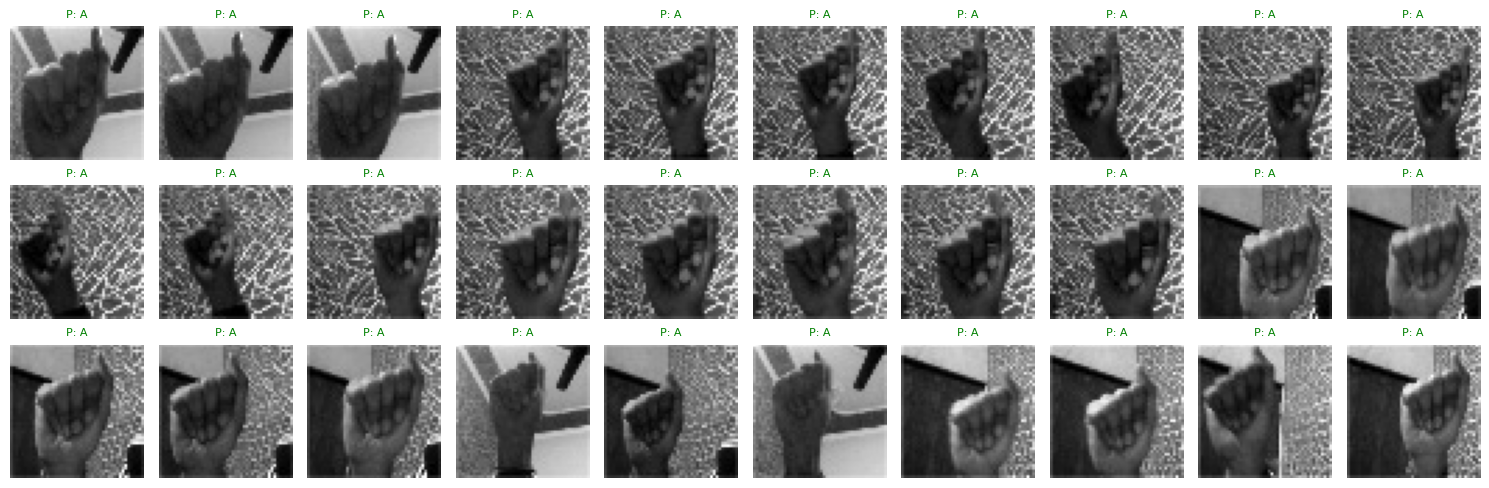

In [12]:
# 10x3 Grid of Predictions
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf  # Make sure to import tensorflow if not already imported

def plot_predictions_grid(model, generator, class_names):
    plt.figure(figsize=(15, 5))
    # Get one batch from the generator
    images, labels = next(generator)
    preds = model.predict(images)
    predicted_labels = np.argmax(preds, axis=1)
    
    # Show first 30 images in 10×3 grid
    for i in range(30):
        ax = plt.subplot(3, 10, i + 1)
        plt.imshow(tf.squeeze(images[i]), cmap='gray')
        true_label = class_names[np.argmax(labels[i])]  # Convert one-hot to label index
        pred_label = class_names[predicted_labels[i]]
        color = 'green' if true_label == pred_label else 'red'
        plt.title(f"P: {pred_label}", color=color, fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Use your validation generator instead of test_ds
plot_predictions_grid(model, validation_generator, class_names)

In [22]:
# FILTER VISUALIZATION CODE
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

def visualize_filters(layer):
    """Visualize filters of a Conv2D layer.
    
    Args:
        layer (Conv2D): A Keras Conv2D layer with weights already initialized.
    """
    if not isinstance(layer, Conv2D):
        raise ValueError("❌ Selected layer is not a Conv2D layer.")
        return

    try:
        filters, _ = layer.get_weights()  # Get weights (filters) and biases (ignored)
    except RuntimeError as e:
        raise RuntimeError("❌ Failed to get weights. Ensure the model has been built (e.g., by calling `model.build()` or running it on sample data).") from e

    num_filters = filters.shape[-1]  # Number of filters
    input_channels = filters.shape[-2]  # Input channels (1 for grayscale, 3 for RGB)

    # Normalize filters to [0, 1] for visualization
    f_min, f_max = np.min(filters), np.max(filters)
    filters = (filters - f_min) / (f_max - f_min + 1e-8)  # Avoid division by zero

    # Calculate grid size (e.g., 4x4 for 16 filters)
    grid_size = int(np.ceil(np.sqrt(num_filters)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    for i in range(grid_size * grid_size):
        ax = axes[i // grid_size, i % grid_size]
        ax.axis('off')

        if i < num_filters:
            if input_channels == 1:
                # Grayscale filter (e.g., MNIST)
                img = filters[:, :, 0, i]
                ax.imshow(img, cmap='gray', vmin=0, vmax=1)  # Ensure correct scaling
            else:
                # RGB filter (e.g., CIFAR-10)
                img = filters[:, :, :, i]
                ax.imshow(img, vmin=0, vmax=1)  # No need to re-normalize

    plt.suptitle(f"Filters from {layer.name}\nShape: {filters.shape[:2]} (Channels: {input_channels}, Filters: {num_filters})", fontsize=14)
    plt.show()

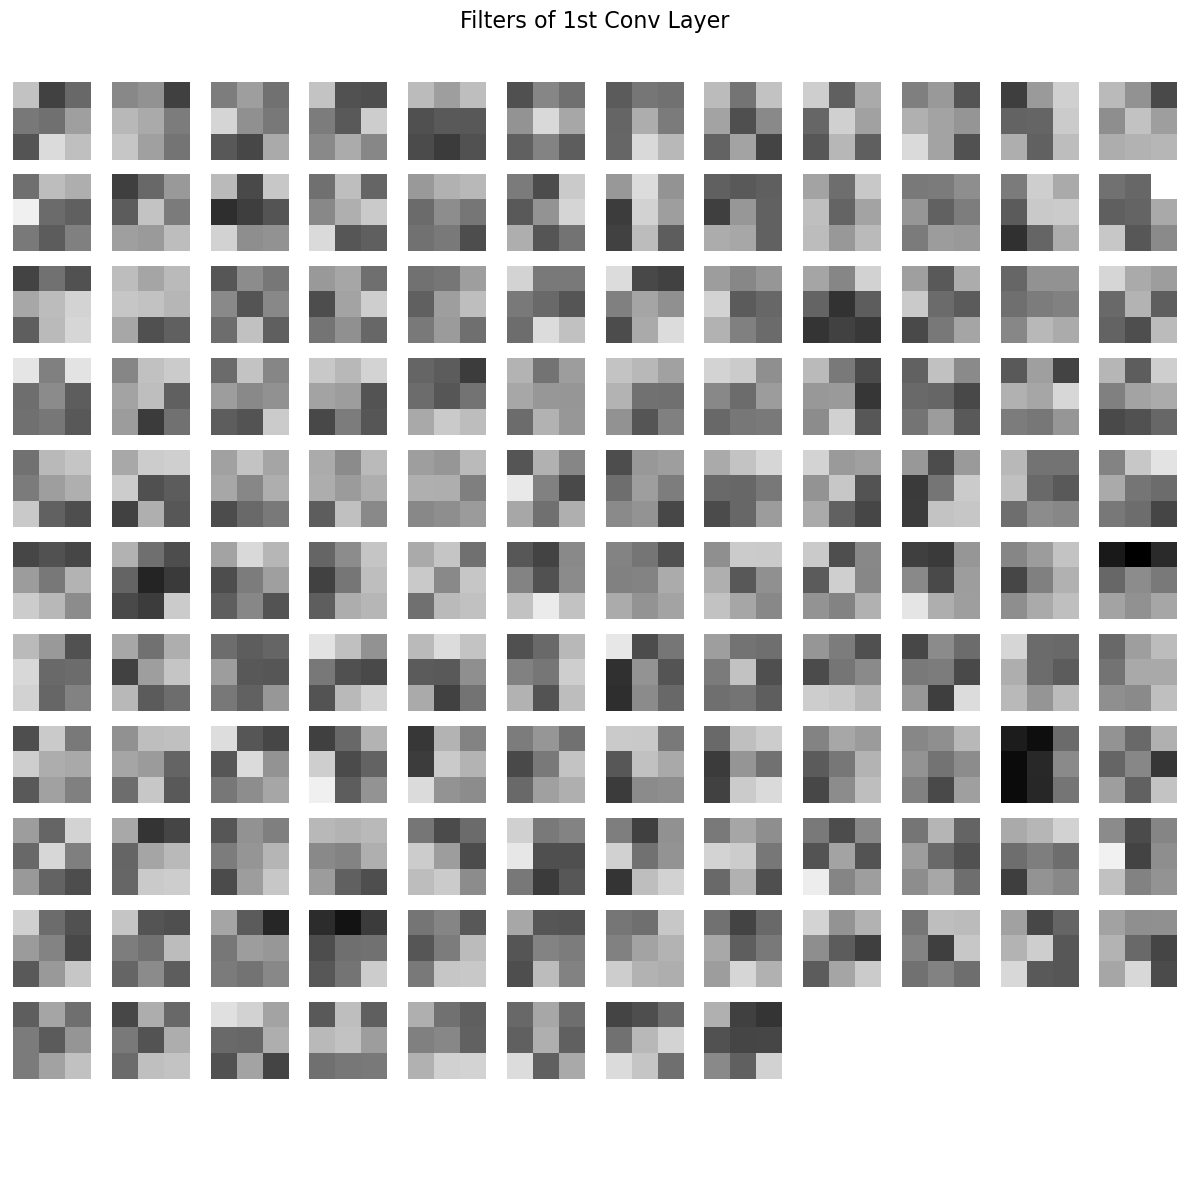

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_filters(layer):
    filters, biases = layer.get_weights()

    # Normalize each filter independently
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    num_filters = filters.shape[-1]
    num_channels = filters.shape[-2]
    grid_size = int(np.ceil(np.sqrt(num_filters)))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))

    for i in range(grid_size * grid_size):
        ax = axes[i // grid_size, i % grid_size]
        ax.axis('off')
        if i < num_filters:
            # Show only the first channel (grayscale), or average over all channels if >1
            if num_channels == 1:
                filter_img = filters[:, :, 0, i]
            else:
                filter_img = np.mean(filters[:, :, :, i], axis=-1)

            ax.imshow(filter_img, cmap='gray', vmin=0, vmax=1)

    plt.suptitle("Filters of 1st Conv Layer", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # Adjust space for title
    plt.show()

# Example usage
first_conv = next((layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)), None)

if first_conv:
    visualize_filters(first_conv)
else:
    print("No Conv2D layer found.")


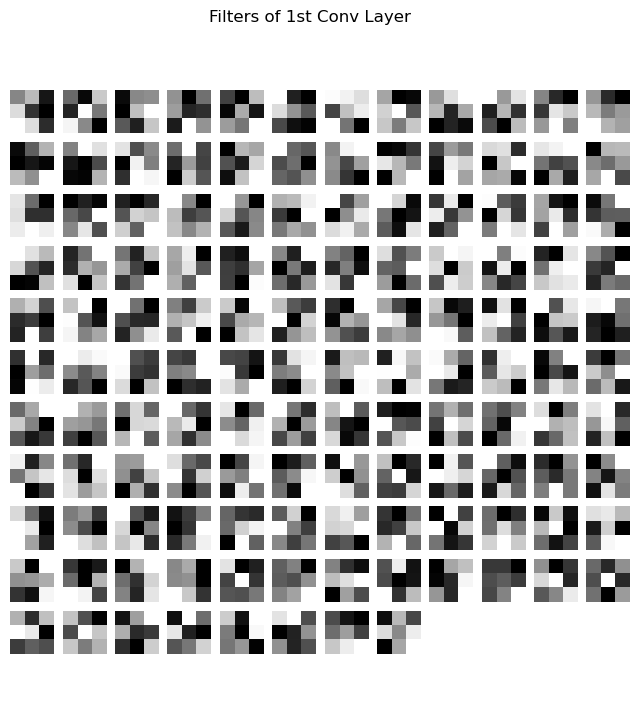

In [12]:
# Filter Visualization of 1st Conv Layer
def visualize_filters(layer):
    filters, _ = layer.get_weights()
    filters = (filters - filters.min()) / (filters.max() - filters.min())  # Normalize for display

    num_filters = filters.shape[-1]
    grid_size = int(np.ceil(np.sqrt(num_filters)))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(8, 8))

    for i in range(grid_size * grid_size):
        ax = axes[i // grid_size, i % grid_size]
        if i < num_filters:
            filter_img = filters[:, :, 0, i]  # grayscale image
            ax.imshow(filter_img, cmap='gray')
        ax.axis('off')

    plt.suptitle("Filters of 1st Conv Layer")
    plt.show()

# Make sure you're passing your actual first conv layer (example: model.layers[0] or model.layers[1])
first_conv = None
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        first_conv = layer
        break

visualize_filters(first_conv)


In [14]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [15]:
# ML-FLOW
import mlflow
import mlflow.keras
from mlflow.models.signature import infer_signature
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Constants
MODEL_NAME = "signlanguagedetectionmodel48x48_mlflow"
model_path = f"{MODEL_NAME}.keras"

# Save model (Keras 3 format)
model.save(model_path)

# Start MLflow run
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Gesture Detection CNN")
mlflow.keras.autolog(log_models=False)

start_time = datetime.datetime.now()

with mlflow.start_run() as run:
    run_id = run.info.run_id
    print(f"MLflow Run started with ID: {run_id}")

    # Log static parameters
    mlflow.log_param("model_type", "Sequential CNN")
    mlflow.log_param("image_size", (48, 48))
    mlflow.log_param("batch_size", 128)
    mlflow.log_param("epochs", 93)

    # Evaluate model on validation set
    val_loss, val_accuracy = model.evaluate(validation_generator)
    mlflow.log_metric("val_loss", val_loss)
    mlflow.log_metric("val_accuracy", val_accuracy)

    # Generate predictions and true labels
    y_pred = model.predict(validation_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = validation_generator.classes
    class_labels = list(validation_generator.class_indices.keys())

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    plt.close()

    # Log confusion matrix image
    mlflow.log_artifact("confusion_matrix.png")

    # Log classification report as a text file
    report = classification_report(y_true, y_pred_classes, target_names=class_labels)
    with open("classification_report.txt", "w") as f:
        f.write(report)
    mlflow.log_artifact("classification_report.txt")

    # Signature (optional)
    sample_batch = next(iter(validation_generator))
    sample_x, _ = sample_batch
    signature = infer_signature(sample_x, model.predict(sample_x))

    # Log model with signature
    mlflow.keras.log_model(model, artifact_path="gesture_cnn_model", signature=signature)

    # Log training time
    end_time = datetime.datetime.now()
    mlflow.log_param("training_duration_sec", (end_time - start_time).total_seconds())

    print("Model, metrics, confusion matrix, and report successfully logged to MLflow.")


2025/05/24 15:22:35 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.8.0, but the installed version is 3.9.2. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.


MLflow Run started with ID: 36e7449a5c874b959fcbe9ccd70c3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 664ms/step - accuracy: 0.9669 - loss: 0.0988
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 683ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step
Model, metrics, confusion matrix, and report successfully logged to MLflow.
🏃 View run suave-lynx-251 at: http://127.0.0.1:5000/#/experiments/715979875290812278/runs/36e7449a5c874b959fcbe9ccd70c3500
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/715979875290812278


In [16]:
# UPDATED MLFLOW CODE:
import mlflow
import mlflow.keras
from mlflow.models.signature import infer_signature
import datetime
import numpy as np

# Setup MLflow tracking
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Gesture Detection CNN")

# Enable auto logging (logs optimizer, loss, metrics, etc.)
mlflow.keras.autolog(log_models=False)  # We'll log model manually with better control

start_time = datetime.datetime.now()

with mlflow.start_run() as run:
    run_id = run.info.run_id
    print(f"🚀 MLflow Run started with ID: {run_id}")

    # Manual params
    mlflow.log_param("model_type", "Sequential CNN")
    mlflow.log_param("image_size", (48, 48))
    mlflow.log_param("batch_size", 128)
    mlflow.log_param("epochs", 93)

    # Training loop (assuming model & generators are defined above)
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=93,
        verbose=1
    )

    # Log metrics over epochs
    for epoch in range(93):
        mlflow.log_metric("train_accuracy", history.history['accuracy'][epoch], step=epoch)
        mlflow.log_metric("val_accuracy", history.history['val_accuracy'][epoch], step=epoch)
        mlflow.log_metric("train_loss", history.history['loss'][epoch], step=epoch)
        mlflow.log_metric("val_loss", history.history['val_loss'][epoch], step=epoch)

    # Save model
    model_path = "signlanguagedetectionmodel48x48_mlflow.h5"
    model.save(model_path)

    # Prepare sample batch to infer input/output signature
    sample_batch = next(iter(train_generator))
    sample_x, sample_y = sample_batch[0], sample_batch[1]
    signature = infer_signature(sample_x, model.predict(sample_x))

    # Log model manually with signature
    mlflow.keras.log_model(model, artifact_path="gesture_cnn_model", signature=signature)

    end_time = datetime.datetime.now()
    mlflow.log_param("training_duration_sec", (end_time - start_time).total_seconds())

    print("✅ Model, metrics, and signature logged to MLflow!")


2025/05/24 15:24:11 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.8.0, but the installed version is 3.9.2. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.


🚀 MLflow Run started with ID: 0eab477a81624f44a79e8e4e749b5c1e


2025/05/24 15:24:11 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/05/24 15:24:11 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/93
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9635 - loss: 0.1291 - val_accuracy: 0.9651 - val_loss: 0.0966
Epoch 2/93
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9660 - loss: 0.0918 - val_accuracy: 0.9677 - val_loss: 0.1257
Epoch 3/93
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9750 - loss: 0.0981 - val_accuracy: 0.9892 - val_loss: 0.0454
Epoch 4/93
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9775 - loss: 0.0747 - val_accuracy: 0.9677 - val_loss: 0.0962
Epoch 5/93
12/12 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.9757 - loss: 0.0997 - val_accuracy: 0.9785 - val_loss: 0.0494
Epoch 6/93
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9718 - loss: 0.0808 - val_accuracy: 0.9731 - val_loss: 0.0806
Epoch 7/93
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9739 - loss: 0.0858 - val_accuracy: 0.9785 - val_loss: 0.0642
Epoch 8/93
12/12 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.9712 - loss: 0.0711 - val_accuracy: 0.9839 - val_loss:

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
✅ Model, metrics, and signature logged to MLflow!
🏃 View run rebellious-smelt-511 at: http://127.0.0.1:5000/#/experiments/715979875290812278/runs/0eab477a81624f44a79e8e4e749b5c1e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/715979875290812278


In [23]:
!kill 27972


kill: 27972: No such process


In [24]:
%load_ext tensorboard
%tensorboard --logdir Logs --port 6007


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 36296), started 0:29:22 ago. (Use '!kill 36296' to kill it.)

In [19]:
%reload_ext tensorboard


In [20]:
model_json = model.to_json()

with open("signlanguagedetectionmodel48x48.json", 'w') as json_file:
    json_file.write(model_json)

model.save("signlanguagedetectionmodel48x48.h5")


In [21]:
import os

# Define your target folder
save_path = r"C:\Users\KIIT0001\Documents\REAL_TIME_DETECTION_ASSIGNMENT"

# Save the model architecture to JSON
model_json = model.to_json()
with open(os.path.join(save_path, "signlanguagedetectionmodel48x48.json"), 'w') as json_file:
    json_file.write(model_json)

# Save the model weights to H5
model.save(os.path.join(save_path, "signlanguagedetectionmodel48x48.h5"))
